<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   md5hash                2860 non-null   object
 1   fitzpatrick_scale      2860 non-null   int64 
 2   fitzpatrick_centaur    2860 non-null   int64 
 3   label                  2860 non-null   object
 4   nine_partition_label   2860 non-null   object
 5   three_partition_label  2860 non-null   object
 6   qc                     90 non-null     object
 7   ddi_scale              2860 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 178.9+ KB
None
       fitzpatrick_scale  fitzpatrick_centaur    ddi_scale
count        2860.000000          2860.000000  2860.000000
mean            2.524476             2.095455    23.547552
std             1.474428             1.510942    15.530522
min            -1.000000            -1.000000    -1.000000
25%             2.000000        

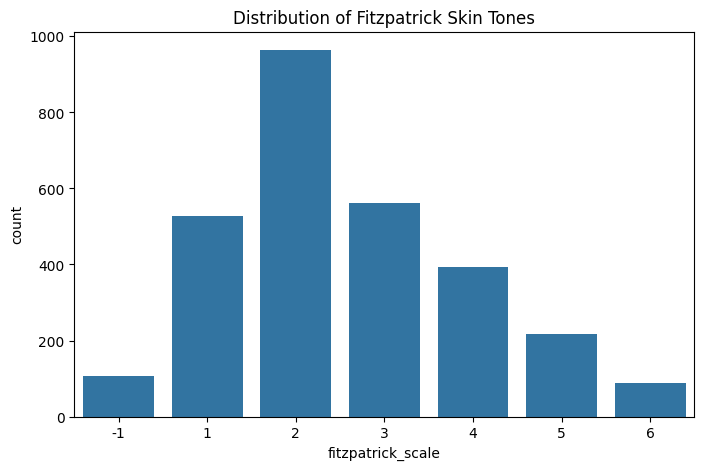

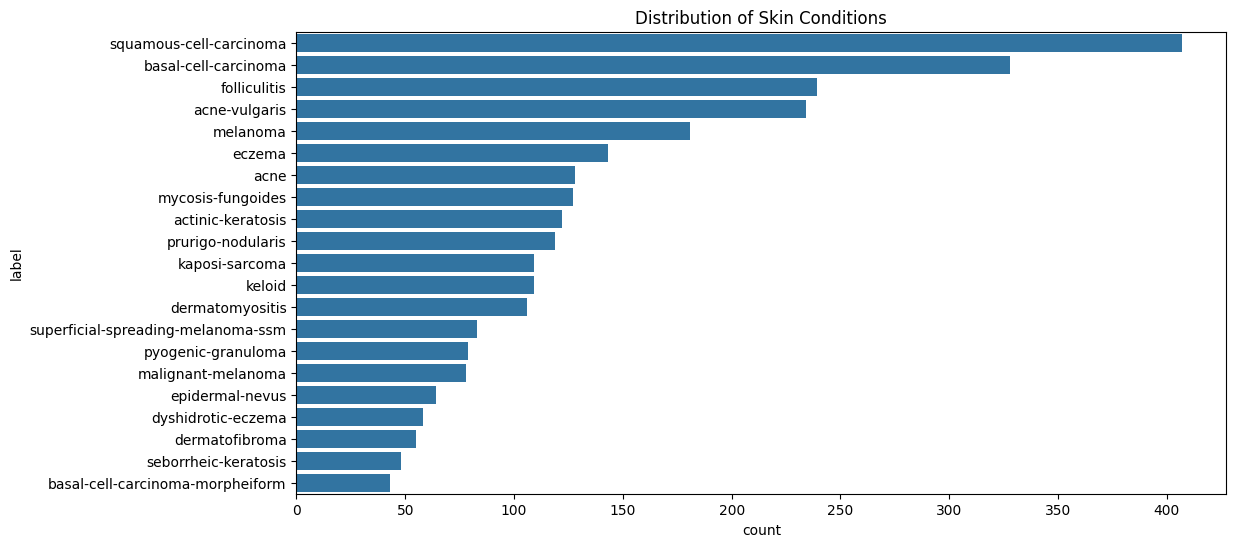

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_df = pd.read_csv("train.csv")

# Display basic info
print(train_df.info())
print(train_df.describe())

# Check distribution of skin tones
plt.figure(figsize=(8,5))
sns.countplot(x='fitzpatrick_scale', data=train_df)
plt.title("Distribution of Fitzpatrick Skin Tones")
plt.show()

# Check distribution of labels
plt.figure(figsize=(12,6))
sns.countplot(y='label', data=train_df, order=train_df['label'].value_counts().index)
plt.title("Distribution of Skin Conditions")
plt.show()

In [17]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to new lines

# Display first 10 rows where 'fitzpatrick_scale' == -1.0
filtered_df = train_df[train_df['fitzpatrick_scale'] == -1.0]
print(filtered_df.head(10))

                              md5hash  fitzpatrick_scale  fitzpatrick_centaur                             label nine_partition_label three_partition_label   qc  ddi_scale
8    763ed484fcc50bf7b67cc44f95bac95e                 -1                   -1                      folliculitis         inflammatory        non-neoplastic  NaN         -1
27   71b67be202663f843f95b5f409b358e4                 -1                   -1  basal-cell-carcinoma-morpheiform  malignant-epidermal             malignant  NaN         -1
34   d04150a06562fb2c21073a745b42f7dc                 -1                    1                dyshidrotic-eczema         inflammatory        non-neoplastic  NaN         -1
39   deb015c236a19812c7c566c778b30337                 -1                   -1           squamous-cell-carcinoma  malignant-epidermal             malignant  NaN         -1
45   52658d843641cd217bf61efc2ed41749                 -1                    2           squamous-cell-carcinoma  malignant-epidermal             

In [18]:
unique_nine = train_df["nine_partition_label"].unique()
unique_three = train_df["three_partition_label"].unique()

# List the unique categories
print(unique_nine)
print(len(unique_nine))
print(unique_three)
print(len(unique_three))

['benign-epidermal' 'malignant-epidermal' 'inflammatory'
 'malignant-cutaneous-lymphoma' 'malignant-melanoma' 'benign-dermal'
 'malignant-dermal']
7
['benign' 'malignant' 'non-neoplastic']
3


In [20]:
# Quality control string 
unique_qc = train_df["qc"].unique()
print(unique_qc)

[nan '1 Diagnostic' '3 Wrongly labelled' '5 Potentially' '4 Other'
 '2 Characteristic']
